# Multiclass Image classification using Convolution Neural Network

## Importing library

In [1]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
DATASET_DIR = os.listdir("signs") 
DATASET_DIR

['handicap sign', 'stop sign', 'us speed limit sign', 'yield sign']

In [3]:
labels=['handicap sign', 'stop sign', 'us speed limit sign', 'yield sign']

### Each folder total image count

In [4]:

DIR = "signs" # path
link = []
for label in labels:
    path = os.path.join(DIR, label) # combine path and labels
    link.append(path) # append in link
print(link)


for i in range(len(link)):
    new = os.listdir(link[i])
    i+=1
    print(f"length : {len(new)}") # each folder total image count 

['signs\\handicap sign', 'signs\\stop sign', 'signs\\us speed limit sign', 'signs\\yield sign']
length : 1011
length : 1000
length : 1232
length : 1079


In [5]:
IMG_SIZE = 224 # image size

data = [] 

def get_data(data_dir):
    for category in labels:
        path = os.path.join(data_dir, category) #combine path
        class_num = labels.index(category) # index no of labels
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR) # color image array
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize
                data.append([resized_array, class_num])
            except Exception as e: # exception
                print(e)
    return data 

In [6]:
data=get_data("signs/")

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\ope

In [7]:
# separate item and label
X = []
y = []
for item, label in data:
    X.append(item)
    y.append(label)

In [8]:
X = np.array(X) / 255 # Normaliation( Now the array will remain 0-1)
y = np.array(y)

### LabelBinarizer is a technique used to convert categorical labels into binary vectors

In [9]:
from sklearn.preprocessing import LabelBinarizer # LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [10]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

### Splitting the data into training and test set


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.20, 
                                                    random_state=42
                                                   )



### CNN model design and training

In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax")) #final dense layer has 4 neurons

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                        

In [14]:
tf.keras.utils.plot_model(model, to_file='model1.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam", 
              metrics=["accuracy"])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [16]:
history = model.fit(x_train, y_train, 
                    epochs=10, validation_data=(x_test, y_test), 
                    batch_size=32) # training part with 10 epochs
# callbacks=[early_stopping]

Epoch 1/10
108/108 [==============================] - 169s 2s/step - loss: 1.2424 - accuracy: 0.5291 - val_loss: 0.6492 - val_accuracy: 0.6973
Epoch 2/10
108/108 [==============================] - 164s 2s/step - loss: 0.5493 - accuracy: 0.7847 - val_loss: 0.3935 - val_accuracy: 0.8428
Epoch 3/10
108/108 [==============================] - 155s 1s/step - loss: 0.3524 - accuracy: 0.8756 - val_loss: 0.2996 - val_accuracy: 0.9080
Epoch 4/10
108/108 [==============================] - 156s 1s/step - loss: 0.2641 - accuracy: 0.9140 - val_loss: 0.2806 - val_accuracy: 0.9034
Epoch 5/10
108/108 [==============================] - 157s 1s/step - loss: 0.1764 - accuracy: 0.9452 - val_loss: 0.2175 - val_accuracy: 0.9278
Epoch 6/10
108/108 [==============================] - 155s 1s/step - loss: 0.1659 - accuracy: 0.9461 - val_loss: 0.2013 - val_accuracy: 0.9371
Epoch 7/10
108/108 [==============================] - 157s 1s/step - loss: 0.1372 - accuracy: 0.9615 - val_loss: 0.1930 - val_accuracy: 0.9534

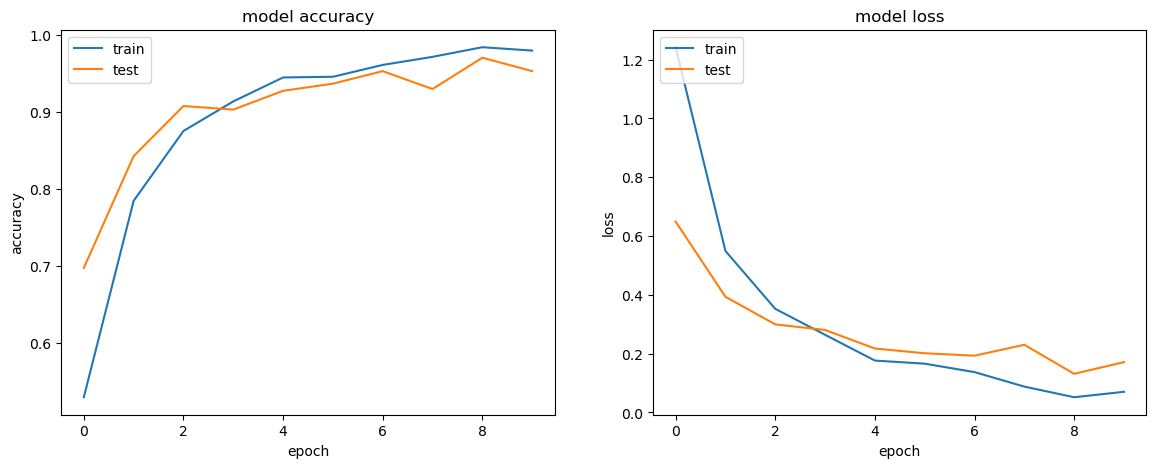

In [17]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9801864624023438
validation_accuracy 0.9534342288970947


In [19]:
score = model.evaluate(x_test, y_test)
model.save("cnn_10_noTL.model") # save model

27/27 [==============================] - 6s 222ms/step - loss: 0.1711 - accuracy: 0.9534
INFO:tensorflow:Assets written to: cnn_10_noTL.model\assets


INFO:tensorflow:Assets written to: cnn_10_noTL.model\assets


## 5. Labeling & Prediction

In [20]:
y_test_inv = label_binarizer.inverse_transform(y_test)

In [21]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

27/27 [==============================] - 7s 241ms/step


In [22]:
classes_x[:5]

array([3, 1, 3, 3, 3], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [24]:
cm=confusion_matrix(y_test_inv,classes_x)

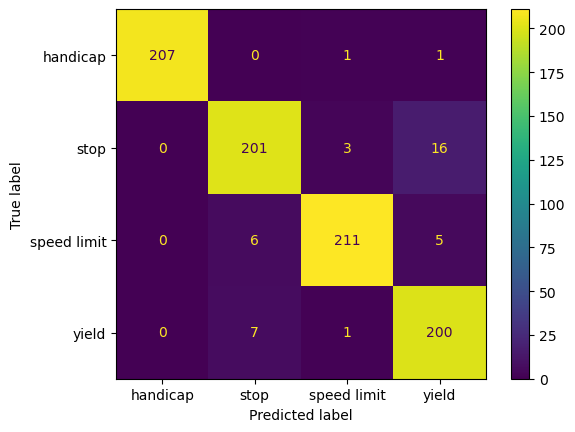

In [25]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['handicap', 'stop', 'speed limit', 'yield'])

cm_display.plot()
plt.show()

In [26]:
print(classification_report(y_test_inv,classes_x))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       209
           1       0.94      0.91      0.93       220
           2       0.98      0.95      0.96       222
           3       0.90      0.96      0.93       208

    accuracy                           0.95       859
   macro avg       0.95      0.95      0.95       859
weighted avg       0.95      0.95      0.95       859



In [42]:
from tensorflow import keras
model_new = keras.models.load_model('cnn_10_noTL.model')

In [50]:
from keras.preprocessing import image
test_image = image.load_img('prediction/yield2.jpg',
                           target_size=(224,224))

In [51]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [52]:
predict_x = model_new.predict(test_image/255.0) 
classes_x = np.round(predict_x).astype(int)

1/1 [==============================] - 0s 63ms/step


In [53]:
classes_x

array([[1, 0, 0, 0]])

In [54]:
handicap = np.array([1,0,0,0])
stop = np.array([0,1,0,0])
speed_limit = np.array([0,0,1,0])
yield_sign = np.array([0,0,0,1])

In [55]:
if np.array_equal(classes_x[0], handicap):
    prediction='handicap sign'
elif np.array_equal(classes_x[0], stop):
    prediction='stop sign'
elif np.array_equal(classes_x[0], speed_limit):
    prediction = 'speed limit sign'
else:
    prediction = 'yield sign'
print(prediction)

handicap sign
